In [9]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 31 14:16:10 2018

@author: Sadjad
"""

import matplotlib.pyplot as plt

from rl.agents import QAgent, RandomAgent
from rl.environments import Environment
from rl.subjects import MNKGame

In [10]:
# load the environment or create a new one
filename = 'mnk333'
try:
    env = Environment(filename=filename)
except FileNotFoundError:
    env = Environment()
    # initialize dictionaries
    agents = {}
    subjects = {}

    # define subjects
    subjects['Board A'] = MNKGame(m=3, n=3, k=3)

    # define agents
    agents['Q'] = QAgent(gamma=1, alpha=0.2, epsilon=0.1)
    agents['Opponent'] = QAgent(gamma=1, alpha=0.2, epsilon=0.1)

    # assign agents to subjects
    assignment = [('Q', 'Board A'), ('Opponent', 'Board A')]

    # update environment
    env.add(agents=agents, subjects=subjects)
    env.assign(assignment)

In [11]:
# set experiment variables
runs = 200
training_episodes = 5000
test_episodes = 100
test_agent = RandomAgent()

results = {'Q training win': [], 'Q training draw': [], 'Q training loss': [],
           'Q test win': [], 'Q test draw': [], 'Q test loss': []}
stats = []

In [12]:
env._agent['Q'].data_collector.start()
env._agent['Q'].data_collector.collect(statistic=['total q'])

for i in range(runs):
    # run and collect statistics
    tally1 = env.elapse(episodes=training_episodes, reset='all',
                        termination='all', learning_method='history',
                        reporting='none', tally='yes')
    stats.append(env._agent['Q'].data_collector.report(statistic=['total q'], update_data=True)['total q'])
    print()

    # switch agents for test
    temp = env._agent['Opponent']
    env._agent['Opponent'] = test_agent
    tally2 = env.elapse(episodes=test_episodes, reset='all',
                        termination='all', learning_method='none',
                        reporting='none', tally='yes')
    env._agent['Opponent'] = temp

    results['Q training win'].append(tally1['Q']/training_episodes)
    results['Q training loss'].append(tally1['Opponent']/training_episodes)
    results['Q training draw'].append((training_episodes-tally1['Q']-tally1['Opponent'])/training_episodes)
    results['Q test win'].append(tally2['Q']/test_episodes)
    results['Q test loss'].append(tally2['Opponent']/test_episodes)
    results['Q test draw'].append((test_episodes-tally2['Q']-tally2['Opponent'])/test_episodes)

    # print result of each run
    print('run {: }: '.format(i), end=' ')
    print('TRAINING: win: {: } draw:{: } loss:{: }'.format(results['Q training win'][-1], results['Q training draw'][-1],
                                                           results['Q training loss'][-1]), end=' ')
    print('TESTING: win: {: } draw:{: } loss:{: }'.format(results['Q test win'][-1], results['Q test draw'][-1],
                                                          results['Q test loss'][-1]), end=' ')
    print('Q-value: {: 3.4f}'.format(stats[-1]))

    # save occasionally in case you don't lose data if you get bored of running the code!
    env.save(filename=filename)


run  0:  TRAINING: win:  0.2572 draw: 0.6396 loss: 0.1032 TESTING: win:  0.96 draw: 0.01 loss: 0.03 Q-value:  90.6860

run  1:  TRAINING: win:  0.2136 draw: 0.7162 loss: 0.0702 TESTING: win:  1.0 draw: 0.0 loss: 0.0 Q-value:  141.5724

run  2:  TRAINING: win:  0.2034 draw: 0.71 loss: 0.0866 TESTING: win:  0.95 draw: 0.05 loss: 0.0 Q-value:  165.0129

run  3:  TRAINING: win:  0.2188 draw: 0.6848 loss: 0.0964 TESTING: win:  1.0 draw: 0.0 loss: 0.0 Q-value:  193.0555

run  4:  TRAINING: win:  0.2208 draw: 0.6916 loss: 0.0876 TESTING: win:  0.92 draw: 0.08 loss: 0.0 Q-value:  229.5086

run  5:  TRAINING: win:  0.1912 draw: 0.715 loss: 0.0938 TESTING: win:  0.95 draw: 0.03 loss: 0.02 Q-value:  245.3014

run  6:  TRAINING: win:  0.2058 draw: 0.7118 loss: 0.0824 TESTING: win:  0.98 draw: 0.02 loss: 0.0 Q-value:  266.5501

run  7:  TRAINING: win:  0.213 draw: 0.6996 loss: 0.0874 TESTING: win:  0.99 draw: 0.01 loss: 0.0 Q-value:  284.3270

run  8:  TRAINING: win:  0.191 draw: 0.7118 loss: 0.09


run  69:  TRAINING: win:  0.196 draw: 0.6934 loss: 0.1106 TESTING: win:  0.94 draw: 0.04 loss: 0.02 Q-value:  448.3654

run  70:  TRAINING: win:  0.1938 draw: 0.6898 loss: 0.1164 TESTING: win:  0.97 draw: 0.03 loss: 0.0 Q-value:  451.3441

run  71:  TRAINING: win:  0.186 draw: 0.6916 loss: 0.1224 TESTING: win:  0.98 draw: 0.02 loss: 0.0 Q-value:  449.4699

run  72:  TRAINING: win:  0.194 draw: 0.7024 loss: 0.1036 TESTING: win:  0.95 draw: 0.05 loss: 0.0 Q-value:  449.8951

run  73:  TRAINING: win:  0.1824 draw: 0.7168 loss: 0.1008 TESTING: win:  1.0 draw: 0.0 loss: 0.0 Q-value:  449.1703

run  74:  TRAINING: win:  0.1978 draw: 0.6972 loss: 0.105 TESTING: win:  0.99 draw: 0.01 loss: 0.0 Q-value:  454.7235

run  75:  TRAINING: win:  0.1986 draw: 0.704 loss: 0.0974 TESTING: win:  0.97 draw: 0.02 loss: 0.01 Q-value:  456.4503

run  76:  TRAINING: win:  0.191 draw: 0.6994 loss: 0.1096 TESTING: win:  0.93 draw: 0.07 loss: 0.0 Q-value:  452.7038

run  77:  TRAINING: win:  0.1886 draw: 0.6982


run  138:  TRAINING: win:  0.1876 draw: 0.7048 loss: 0.1076 TESTING: win:  0.98 draw: 0.02 loss: 0.0 Q-value:  428.8826

run  139:  TRAINING: win:  0.194 draw: 0.7052 loss: 0.1008 TESTING: win:  0.97 draw: 0.03 loss: 0.0 Q-value:  430.8746

run  140:  TRAINING: win:  0.1914 draw: 0.6892 loss: 0.1194 TESTING: win:  1.0 draw: 0.0 loss: 0.0 Q-value:  432.5602

run  141:  TRAINING: win:  0.2082 draw: 0.684 loss: 0.1078 TESTING: win:  0.99 draw: 0.01 loss: 0.0 Q-value:  431.9013

run  142:  TRAINING: win:  0.2052 draw: 0.6882 loss: 0.1066 TESTING: win:  0.99 draw: 0.01 loss: 0.0 Q-value:  427.4176

run  143:  TRAINING: win:  0.1876 draw: 0.7098 loss: 0.1026 TESTING: win:  0.99 draw: 0.01 loss: 0.0 Q-value:  426.5971

run  144:  TRAINING: win:  0.1862 draw: 0.6998 loss: 0.114 TESTING: win:  0.98 draw: 0.02 loss: 0.0 Q-value:  425.9950

run  145:  TRAINING: win:  0.1868 draw: 0.6998 loss: 0.1134 TESTING: win:  0.98 draw: 0.02 loss: 0.0 Q-value:  429.4338

run  146:  TRAINING: win:  0.1796 dr

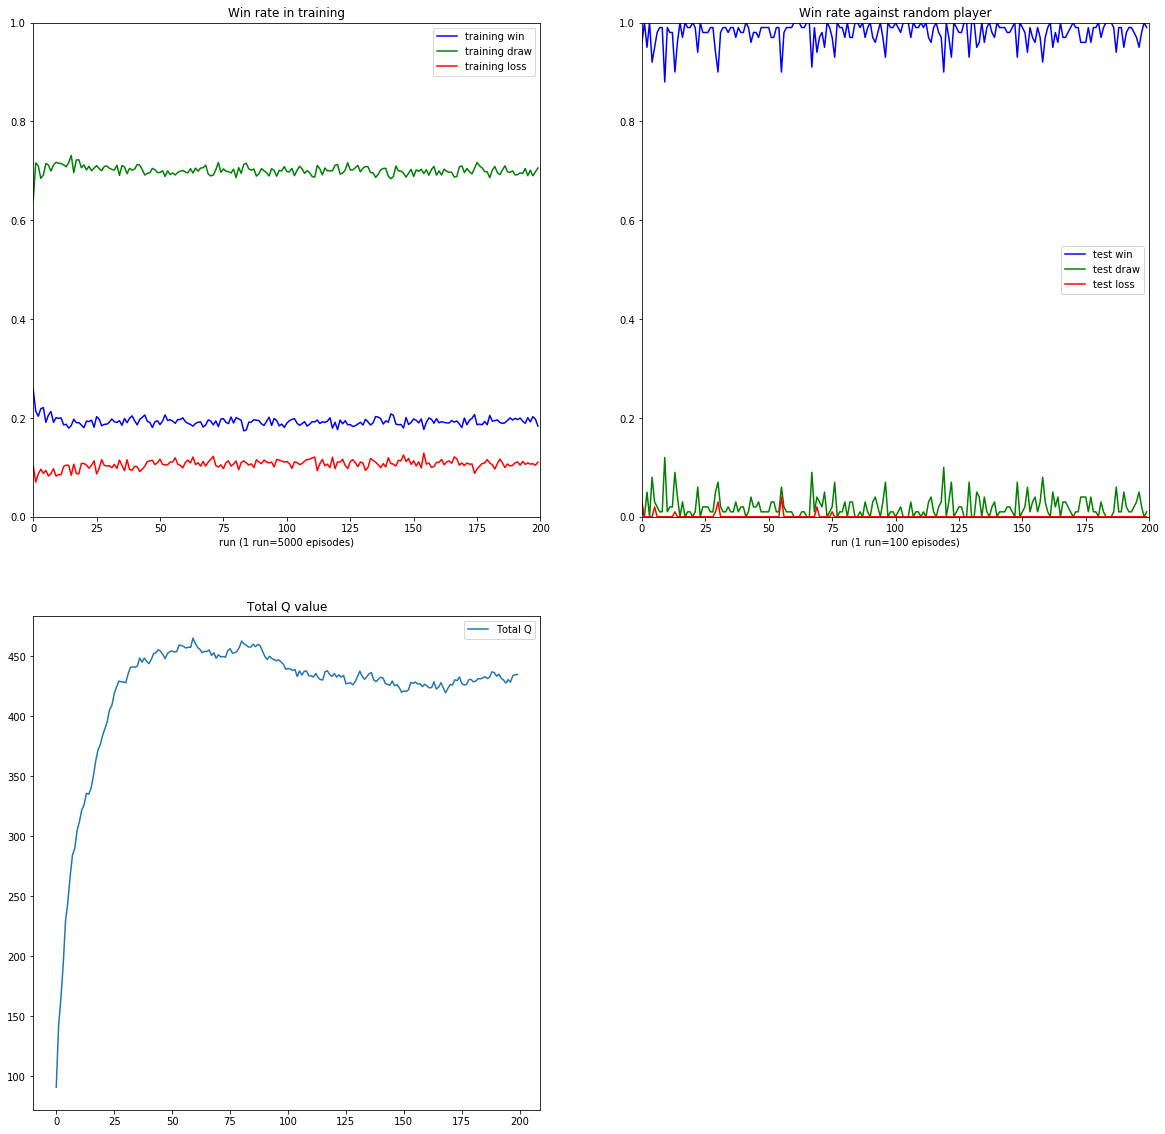

In [13]:
# show statistics
x = list(range(len(results['Q training win'])))
plt.subplots(figsize=(20, 20))
plt.subplot(221)
plt.title('Win rate in training')
plt.plot(x, results['Q training win'], 'b', label='training win')
plt.plot(x, results['Q training draw'], 'g', label='training draw')
plt.plot(x, results['Q training loss'], 'r', label='training loss')
plt.axis([0, len(x), 0, 1])
plt.xlabel('run (1 run={} episodes)'.format(training_episodes))
plt.legend()

plt.subplot(222)
plt.title('Win rate against random player')
plt.plot(x, results['Q test win'], 'b', label='test win')
plt.plot(x, results['Q test draw'], 'g', label='test draw')
plt.plot(x, results['Q test loss'], 'r', label='test loss')
plt.axis([0, len(x), 0, 1])
plt.xlabel('run (1 run={} episodes)'.format(test_episodes))
plt.legend()

plt.subplot(223)
plt.title('Total Q value')
plt.plot(x, stats, label='Total Q')
plt.legend()

plt.show()